In [1]:
%matplotlib notebook

In [2]:
# loading standard modules
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_ubyte
from skimage.color import rgb2grey

# loading custom module (requires file asg1.py in the same directory as the notebook file)
from asg1 import Figure, RegionGrowingPresenter, MaskBuilder

In [3]:
class MyRegionGrowing:
    none_value = 0
    threshold_value = 2

    def __init__(self, img):
        self.fig = Figure()
        self.pres = RegionGrowingPresenter(img, self)
        self.pres.connect_figure(self.fig)

        num_rows = self.num_rows = img.shape[0]
        num_cols = self.num_cols = img.shape[1]

        # creating gray-scale version of the image
        self.intensities = img_as_ubyte(rgb2grey(img))

        # mask "region_mask_builder" where pixels of each "region" will have a unique index-label (like 1,2,3,...)
        # the default mask value in is "none-value" (0) implying pixels that do not belong to any region (yet)
        self.region_mask_builder = MaskBuilder(num_rows, num_cols, self.none_value)
        
        # region counter
        self.last_used_region_value = self.none_value  

        # 4-neighbors graph: pair (neighbor_xs[i],neighbor_xs[j]) defines horizontal and vertical shift to the "i"-th neighbor)
        # self.neighbor_xs = [0, 1,  0, -1]
        # self.neighbor_ys = [1, 0, -1,  0]

        # 8-neighbors graph: pair (neighbor_xs[i],neighbor_xs[j]) defines horizontal and vertical shift to the "i"-th neighbor)
        self.neighbor_xs = [0, 1, 1,  1,  0, -1, -1, -1]
        self.neighbor_ys = [1, 1, 0, -1, -1, -1,  0,  1]

    def run(self):
        self.fig.show()

    # The function below is called from "on_mouse_down" in RegionGrowingPresenter".
    # It's goal is to traverse the "region" grown from seed (sx,sy) and mark pixels in this region
    # by a unique index-label (new-region-value) in the mask (region_mask_builder)
    def grow_new_region_starting_at(self, sx, sy):  
        num_rows = self.num_rows
        num_cols = self.num_cols

        neighbor_xs = self.neighbor_xs
        neighbor_ys = self.neighbor_ys
        num_neighbors = len(neighbor_xs)

        I = self.intensities

        # obtain "current" region index-label (increments region counter)
        new_region_value = self.get_new_region_value() 

        queue = []
        queue.append((sx,sy))

        # the loop below implements Breadth-First-Search (BFS)
        while len(queue) != 0:
            x,y = queue.pop(0)

            for k in xrange(num_neighbors):
                nx = x + neighbor_xs[k]
                ny = y + neighbor_ys[k]

                if 0 <= nx and nx < num_cols and 0 <= ny and ny < num_rows:
                    if self.region_mask_builder.get_value_at(nx,ny) == self.none_value and abs(int(I[y,x]) - int(I[ny,nx])) < self.threshold_value:
                        self.region_mask_builder.add_point(nx,ny, new_region_value)
                        queue.append((nx,ny))

    # This function increments the region counter (index of the "current" region)                    
    def get_new_region_value(self):
        new_region_value = self.last_used_region_value + 1
        self.last_used_region_value = new_region_value
        return new_region_value

    def get_region_mask(self):
        return self.region_mask_builder.get_mask()

### Notes about the region growing interface:
1. To grow a new region (left) click on a seed inside this region 
2. The left click generates "on_mouse_down" event activating the corresponding (call-back) function in "RegionGrowingPresenter" (implemented in asg1.py) contained by "MyRegionGrowing" object.
3. This function first calls "grow_new_region_starting_at" that adds a new region to the mask "region_mask_buiulder" (an array of region indicator labels). 
4. Then, the same "on_mouse_down" function calls "get_region_mask" in order to color the image according to this updated mask.

<IPython.core.display.Javascript object>


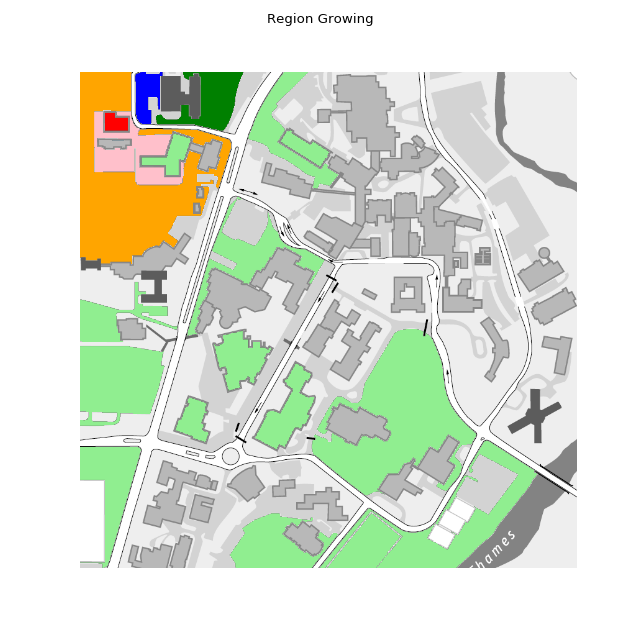

In [4]:
img = plt.imread('images/uwocampus.bmp')
app = MyRegionGrowing(img[:800,:800])
app.run()